In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
import matplotlib.pyplot as plt

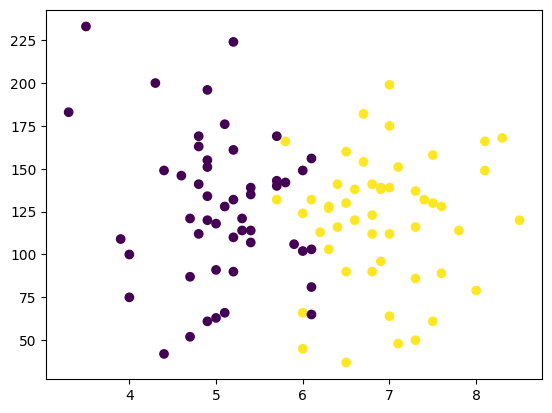

In [11]:
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])

In [13]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [20]:
X_train

,cgpa,iq
39,4.6,146.0
78,6.1,81.0
72,7.3,116.0
58,8.0,79.0
37,8.1,149.0
...,...,...
65,8.1,166.0
59,4.8,112.0
68,4.0,75.0
79,6.5,90.0


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train=scaler.fit_transform(X_train)

In [24]:
X_train

array([[-1.19669174,  0.58167847],
       [ 0.10406015, -0.99589179],
       [ 1.14466166, -0.14643088],
       [ 1.75167921, -1.04443241],
       [ 1.83839601,  0.6544894 ],
       [ 0.27749374, -0.46194493],
       [ 0.36421053, -0.14643088],
       [ 0.10406015,  0.24189411],
       [ 1.31809525, -1.48129802],
       [ 2.01182959,  1.11562532],
       [ 0.10406015, -0.46194493],
       [-1.02325815,  0.99427377],
       [-0.5029574 , -0.1949715 ],
       [ 0.53764412, -0.04934963],
       [-0.93654136, -0.04934963],
       [-2.32401005,  1.47968   ],
       [ 0.53764412,  0.38751598],
       [ 0.10406015, -1.38421677],
       [ 1.40481204, -0.80172929],
       [ 0.79779449, -0.63183711],
       [ 0.01734336, -0.48621524],
       [-1.37012533,  0.6544894 ],
       [-0.93654136, -1.48129802],
       [ 0.88451129,  0.41178629],
       [ 0.45092732, -2.0637855 ],
       [-0.84982457, -0.75318867],
       [ 0.97122808, -1.79681207],
       [ 0.79779449,  0.41178629],
       [-0.67639098,

In [25]:
X_test=scaler.transform(X_test)

In [26]:
X_test

array([[-0.15609023,  0.48459722],
       [ 0.27749374,  0.14481286],
       [ 0.88451129,  1.28551751],
       [-0.67639098,  0.94573314],
       [-1.10997495, -0.02507932],
       [ 1.31809525,  0.19335348],
       [-0.67639098,  0.24189411],
       [-0.24280702,  0.4360566 ],
       [ 1.57824563, -0.1949715 ],
       [-0.24280702,  0.24189411]])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf = LogisticRegression()

In [30]:
clf.fit(X_train, Y_train)

LogisticRegression()

In [33]:
Y_pred = clf.predict(X_test)

In [32]:
Y_test

4     0
63    1
52    1
47    0
24    0
83    1
19    0
36    0
55    1
87    1
Name: placement, dtype: int64

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(Y_test,Y_pred)

0.9

In [37]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

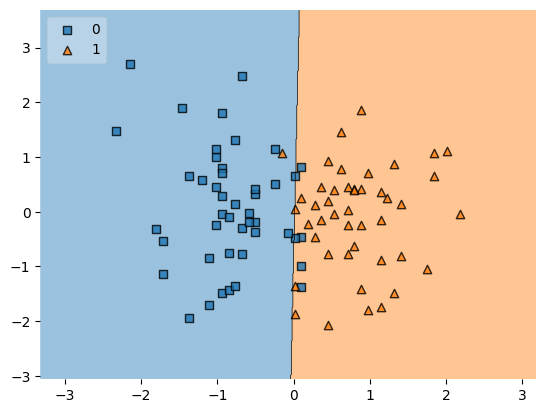

In [38]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [39]:
import pickle

In [40]:
pickle.dump(clf,open('model.pk1','wb'))